In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
def f(x):
    return(100 *  (x[1][0] - x[0][0] ** 2) ** 2 + (1 - x[0][0]) ** 2)

def grad_f(x):
    return(np.array([[400 * x[0][0] ** 3 - 400 * x[0][0] * x[1][0] + 2 * x[0][0] - 2], [200 * (x[1][0] - x[0][0] ** 2)]]))

def hessian_f(x):
    return(np.array([[1200 * x[0][0] ** 2 - 400 * x[1][0] + 2, -400 * x[0][0]], [-400 * x[0][0], 200]]))

In [3]:
def back_track(x, alpha, c, d, rho):
    while True:
        if f(x + alpha * d) <= f(x) + c * alpha * grad_f(x).T @ d:
            return alpha
        alpha *= rho

In [4]:
def gradient_descent(x_0, alpha = 0.5, c = 0.1, rho = 0.8, n_itr = 100):
    xs = np.array([x_0])
    for k in range(n_itr):
        d = -1 * grad_f(xs[k])
        xs = np.append(xs, [xs[k] + back_track(xs[k], alpha, c, d, rho) * d], axis = 0)
    return xs

def newton_method(x_0, n_itr = 50):
    xs = np.array([x_0])
    for k in range(n_itr):
        d = -1 * np.linalg.inv(hessian_f(xs[k])) @ grad_f(xs[k])
        xs = np.append(xs, [xs[k] + d], axis = 0)
    return xs

def quasi_newton_method(x_0, H = np.array([[1, 0], [0, 1]]), alpha = 0.5, c = 0.1, rho = 0.8 ,n_itr = 50):
    xs = np.array([x_0])
    for k in range(n_itr):
        d = -1 * H @ grad_f(xs[k])
        xs = np.append(xs, [xs[k] + back_track(xs[k], alpha, c, d, rho) * d], axis = 0)
        s = xs[k + 1] - xs[k]
        y = grad_f(xs[k + 1]) - grad_f(xs[k])
        H = (np.identity(2) - (s @ y.T) / (y.T @ s)) @ H @ (np.identity(2) - (y @ s.T) / (y.T @ s)) + (s @ s.T) / (s.T @ y)
    return xs

In [5]:
def error(v, optimum_point = np.array([[1], [1]])):
    return np.log10(np.linalg.norm(v - optimum_point))

def plot_errors(start, start_str):
    gradient_transition = gradient_descent(start)
    newton_transition = newton_method(start)
    quasi_newton_transition = quasi_newton_method(start)

    plt.plot(np.arange(len(gradient_transition)), np.apply_along_axis(error, 1, gradient_transition).flatten(), label='最急降下法')
    plt.plot(np.arange(len(newton_transition)), np.apply_along_axis(error, 1, newton_transition).flatten(), label='ニュートン法')
    plt.plot(np.arange(len(quasi_newton_transition)), np.apply_along_axis(error, 1, quasi_newton_transition).flatten(), label='準ニュートン法')
    plt.legend()
    plt.title(start_str + "から始めた場合の誤差ベクトルのノルムの常用対数")
    plt.xlabel('反復回数 (k)')
    plt.ylabel('log_10(||x* - x_k||)')
    plt.grid()
    plt.show()

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


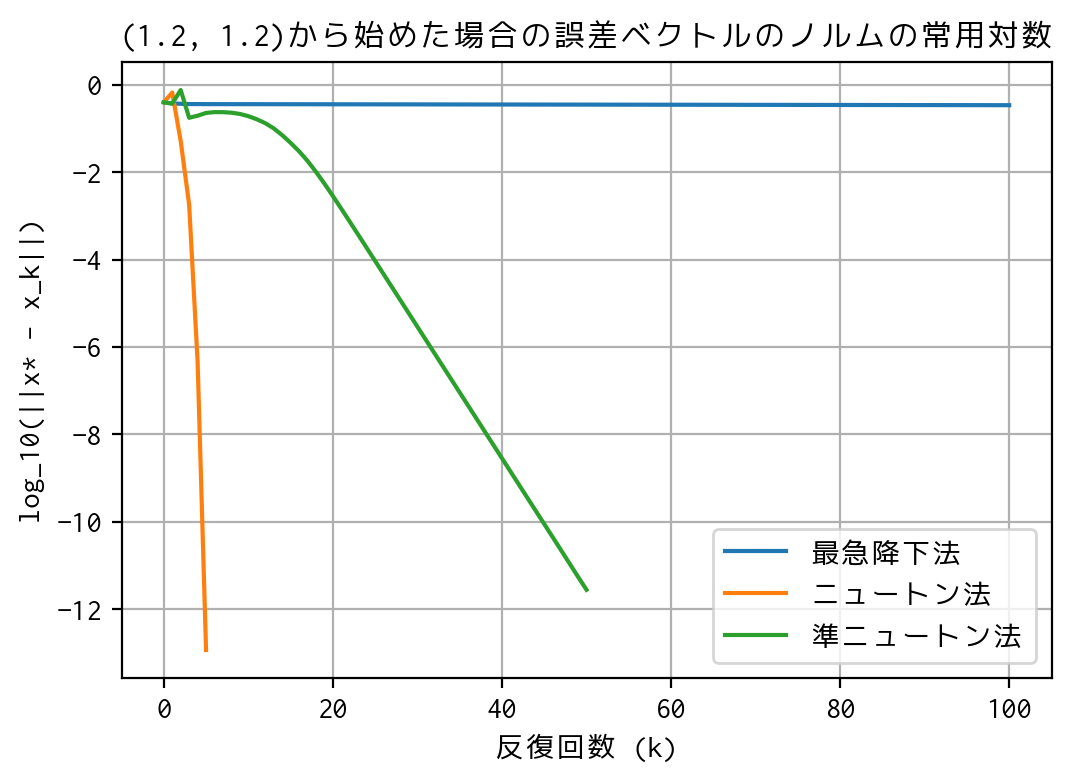

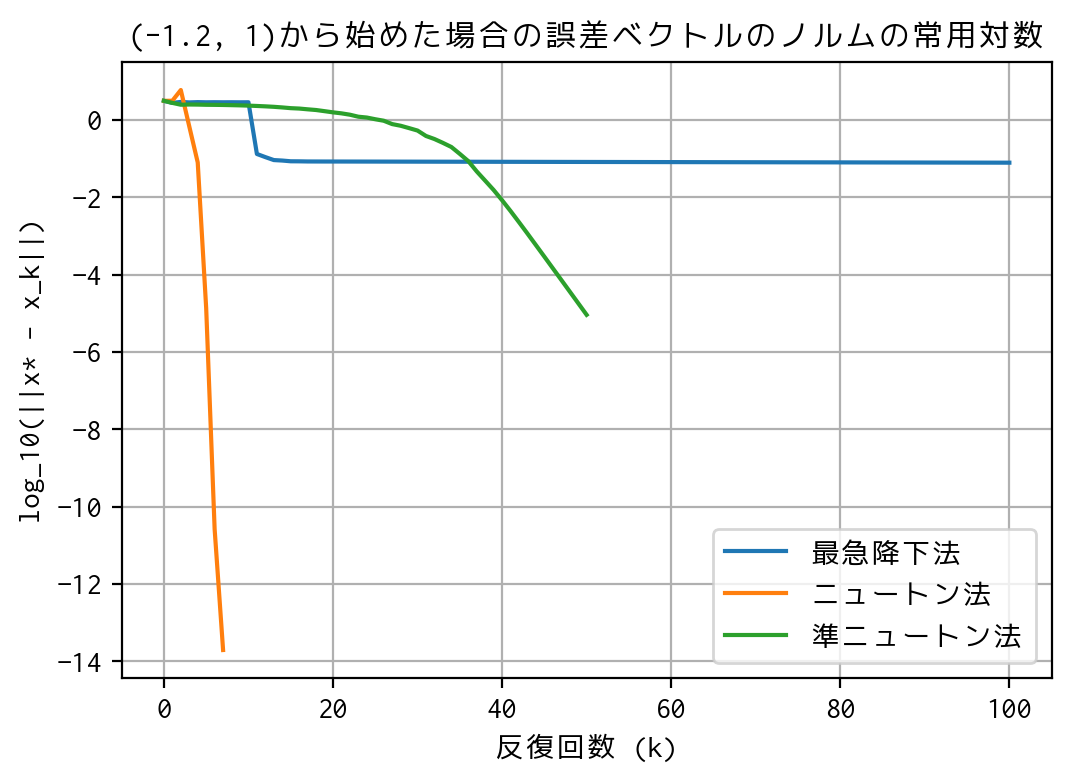

In [6]:
plot_errors(np.array([[1.2], [1.2]]), '(1.2, 1.2)')
plot_errors(np.array([[-1.2], [1.]]), '(-1.2, 1)')

In [7]:
def plot_transitions(start, start_str):
    plt.scatter([1], [1], label='最適点', color='red')
    
    gradient_transition = gradient_descent(start)
    newton_transition = newton_method(start)
    quasi_newton_transition = quasi_newton_method(start)

    plt.plot(gradient_transition[:, 0], gradient_transition[:, 1], label='最急降下法')
    plt.plot(newton_transition[:, 0], newton_transition[:, 1], label='ニュートン法')
    plt.plot(quasi_newton_transition[:, 0], quasi_newton_transition[:, 1], label='準ニュートン法')
    plt.legend()
    plt.title(start_str + "から始めた場合の誤差ベクトルのノルムの常用対数")
    plt.xlabel('反復回数 (k)')
    plt.ylabel('log_10(||x* - x_k||)')
    plt.grid()
    plt.show()

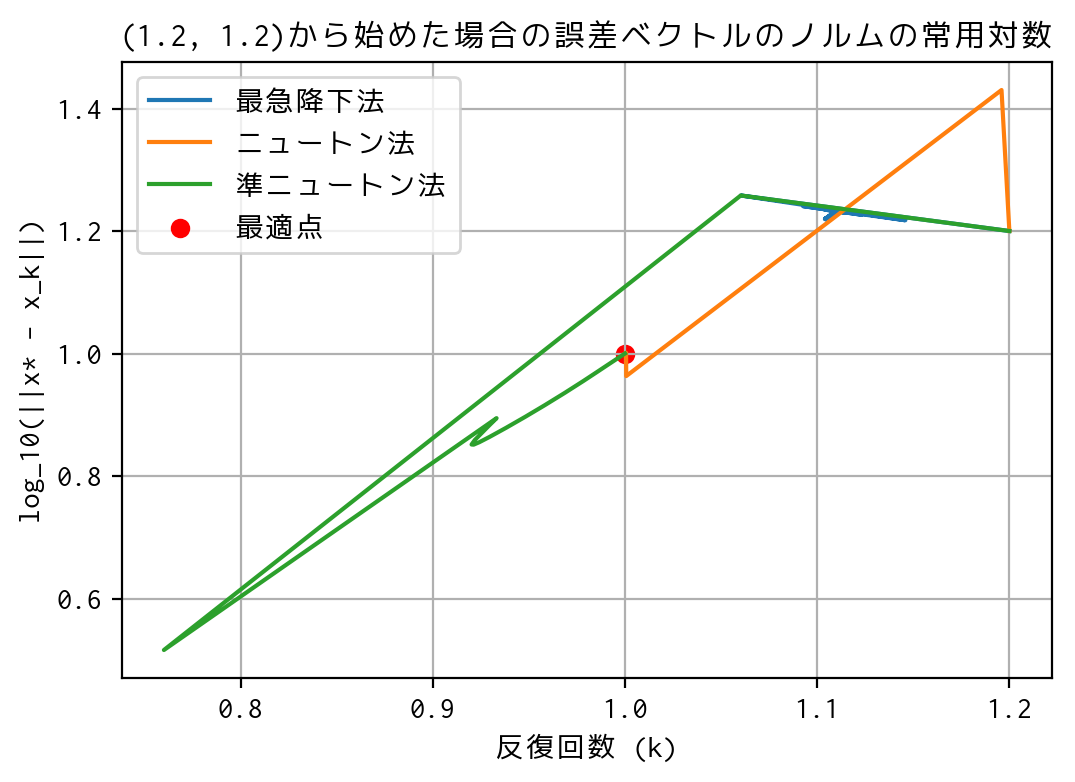

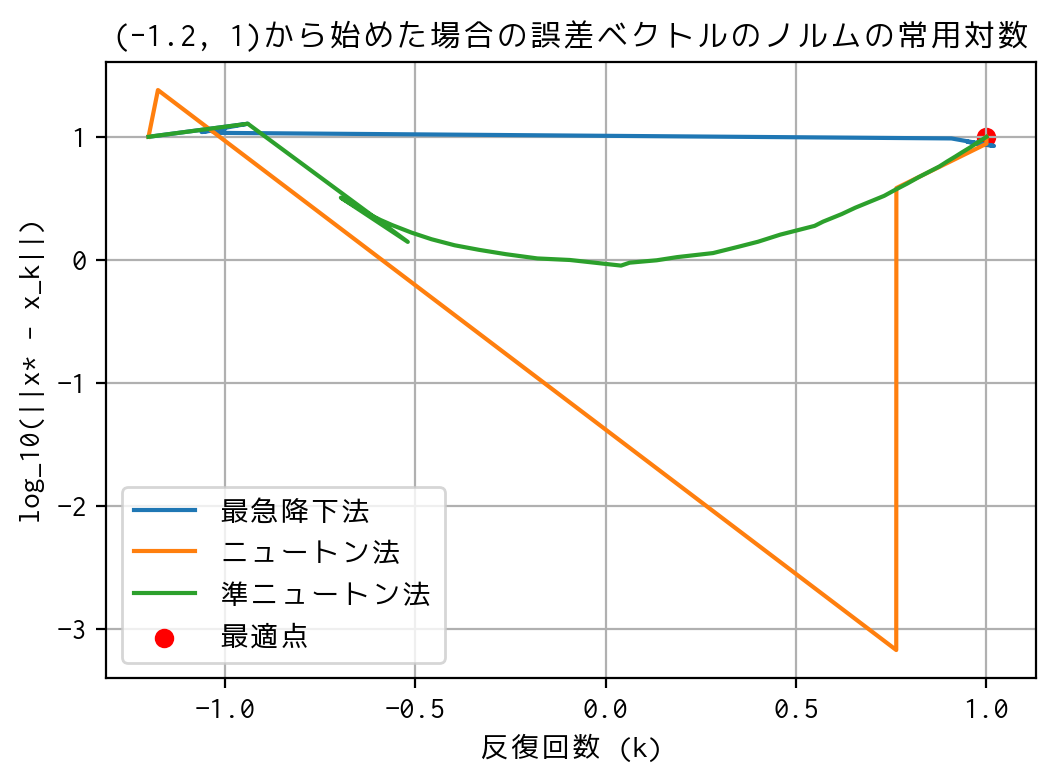

In [8]:
plot_transitions(np.array([[1.2], [1.2]]), '(1.2, 1.2)')
plot_transitions(np.array([[-1.2], [1.]]), '(-1.2, 1)')